In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
shampoo = pd.read_csv('C:\\Users\\sameer\\Desktop\\sales-of-shampoo.csv',parse_dates = True, squeeze = True, index_col = [0])

In [62]:
shampoo.head()

month
1-01    266.0
1-02    145.9
1-03    183.1
1-04    119.3
1-05    180.3
Name: sales, dtype: float64

In [63]:
type(shampoo)

pandas.core.series.Series

In [64]:
shampoo.tail()

month
3-08    407.6
3-09    682.0
3-10    475.3
3-11    581.3
3-12    646.9
Name: sales, dtype: float64

In [65]:
shampoo.describe()

count     36.000000
mean     312.600000
std      148.937164
min      119.300000
25%      192.450000
50%      280.150000
75%      411.100000
max      682.000000
Name: sales, dtype: float64

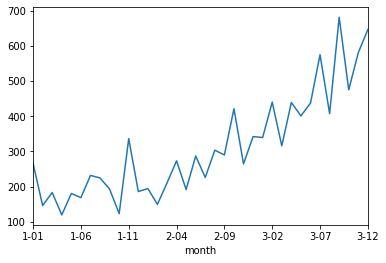

In [66]:
shampoo.plot()

In [67]:
shampoo_ma = shampoo.rolling(window = 6).mean() # Moving Average

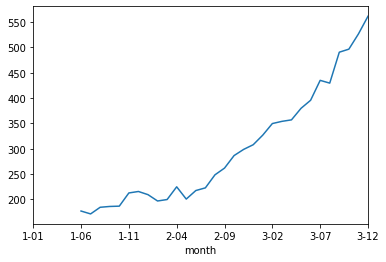

In [68]:
shampoo_ma.plot()

In [69]:
shampoo_base = pd.concat([shampoo,shampoo.shift(1)],axis = 1) # Naive Model

In [70]:
shampoo_base.head()

,sales,sales
month,,
1-01,266.0,NaN
1-02,145.9,266.0
1-03,183.1,145.9
1-04,119.3,183.1
1-05,180.3,119.3


In [71]:
shampoo_base.columns = ['Actual_Sales','Forecast_Sales']
shampoo_base.head()

,Actual_Sales,Forecast_Sales
month,,
1-01,266.0,NaN
1-02,145.9,266.0
1-03,183.1,145.9
1-04,119.3,183.1
1-05,180.3,119.3


In [72]:
shampoo_base.dropna(inplace = True) # Dropping NAN values
shampoo_base.head()

,Actual_Sales,Forecast_Sales
month,,
1-02,145.9,266.0
1-03,183.1,145.9
1-04,119.3,183.1
1-05,180.3,119.3
1-06,168.5,180.3


In [73]:
from sklearn.metrics import mean_squared_error

In [74]:
Error = np.sqrt(mean_squared_error(shampoo_base.Actual_Sales,shampoo_base.Forecast_Sales))
Error

108.23764726616282

In [75]:
from statsmodels.tsa.arima_model import ARIMA #Arima model(p,d,q)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

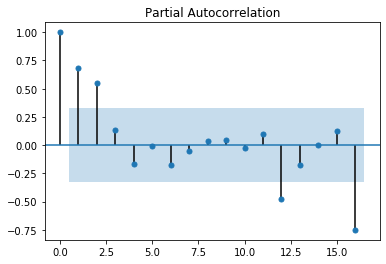

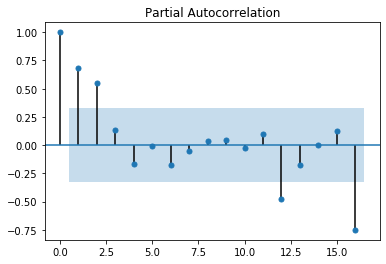

In [76]:
plot_pacf(shampoo) # p

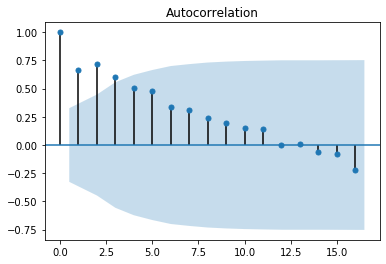

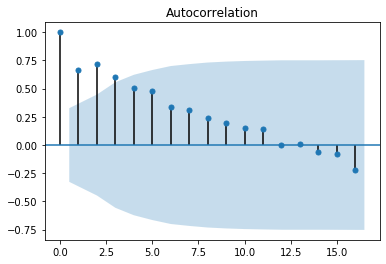

In [77]:
plot_acf(shampoo) # q

In [78]:
shampoo_train = shampoo[0:25]
shampoo_test = shampoo[25:36]

In [79]:
shampoo_model = ARIMA(shampoo_train,order=(3,1,2))

C:\Users\sameer\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\sameer\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [80]:
shampoo_model_fit = shampoo_model.fit()

In [81]:
shampoo_forecast = shampoo_model_fit.forecast(steps = 11)[0]

In [82]:
Error_Arima = np.sqrt(mean_squared_error(shampoo_test,shampoo_forecast))
Error_Arima # Error higher than Naive model -> reject this model

130.92693831947986

In [83]:
# Tuning the parameters
p_values = range(0,5)
d_values = range(0,3)
q_values = range(0,5)

In [85]:
import warnings
warnings.filterwarnings("ignore")

In [89]:
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            train,test = shampoo[0:25], shampoo[25:36]
            predictions = list()
            for i in range(len(test)):
                try:
                    model = ARIMA(train,order)
                    model_fit = model.fit(disp = 0)
                    pred_y = model_fit.forecast()[0]
                    predictions.append(pred_y)
                    error = np.sqrt(mean_squared_error(test,predictions))
                    print('ARIMA%s RMSE = %.2f'%(order,error))
                except:
                    continue
# Order (3,2,3) with error - 120.38 is still higher than Naive model -> Reject it

ARIMA(0, 0, 0) RMSE = 279.20
ARIMA(0, 0, 1) RMSE = 264.80
ARIMA(0, 0, 2) RMSE = 242.01
ARIMA(0, 0, 3) RMSE = 249.06
ARIMA(0, 1, 0) RMSE = 183.98
ARIMA(0, 1, 1) RMSE = 201.62
ARIMA(0, 1, 2) RMSE = 185.77
ARIMA(0, 2, 0) RMSE = 184.44
ARIMA(0, 2, 1) RMSE = 168.50
ARIMA(1, 0, 0) RMSE = 247.30
ARIMA(1, 0, 1) RMSE = 215.71
ARIMA(1, 0, 2) RMSE = 209.58
ARIMA(1, 1, 0) RMSE = 178.01
ARIMA(1, 1, 1) RMSE = 205.37
ARIMA(1, 2, 0) RMSE = 137.28
ARIMA(1, 2, 1) RMSE = 161.65
ARIMA(2, 0, 0) RMSE = 212.72
ARIMA(2, 0, 1) RMSE = 181.70
ARIMA(2, 1, 0) RMSE = 188.38
ARIMA(2, 1, 1) RMSE = 199.08
ARIMA(2, 1, 2) RMSE = 189.43
ARIMA(2, 2, 0) RMSE = 184.46
ARIMA(3, 0, 0) RMSE = 215.24
ARIMA(3, 0, 1) RMSE = 174.79
ARIMA(3, 1, 0) RMSE = 148.41
ARIMA(3, 1, 1) RMSE = 151.13
ARIMA(3, 1, 2) RMSE = 134.52
ARIMA(3, 1, 4) RMSE = 193.94
ARIMA(3, 2, 0) RMSE = 157.15
ARIMA(3, 2, 1) RMSE = 127.94
ARIMA(3, 2, 2) RMSE = 125.71
ARIMA(3, 2, 3) RMSE = 120.38
ARIMA(4, 0, 0) RMSE = 182.30
ARIMA(4, 0, 1) RMSE = 168.38
ARIMA(4, 0, 2)